NLP Course Project - Identification of Human Values behind Arguments

Authors:

*   Fabian Vincenzi fabian.vincenzi@studio.unibo.it
*   Davide Perozzi davide.perozzi@studio.unibo.it
*   Martina Ianaro martina.ianaro@studio.unibo.it


https://github.com/martinaianaro99/Natural_Language_Processing/blob/main/Course_Project/Project_NLP.ipynb


## Download data

In [ ]:
# download data
!wget https://zenodo.org/record/7503506/files/arguments-training.tsv
!wget https://zenodo.org/record/7503506/files/labels-training.tsv
!wget https://zenodo.org/record/7503506/files/arguments-validation.tsv
!wget https://zenodo.org/record/7503506/files/labels-validation.tsv
!wget https://zenodo.org/record/7503506/files/arguments-test.tsv

--2023-02-08 12:43:44--  https://zenodo.org/record/7503506/files/arguments-training.tsv
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1012498 (989K) [application/octet-stream]
Saving to: ‘arguments-training.tsv’

arguments-training. 100%[===================>] 988.77K   364KB/s    in 2.7s    

2023-02-08 12:43:50 (364 KB/s) - ‘arguments-training.tsv’ saved [1012498/1012498]

--2023-02-08 12:43:50--  https://zenodo.org/record/7503506/files/labels-training.tsv
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253843 (248K) [application/octet-stream]
Saving to: ‘labels-training.tsv’

labels-training.tsv 100%[===================>] 247.89K   386KB/s    in 0.6s    

2023-02-08 12:43:52 (386 KB/s) - ‘labels-training.tsv’ saved [253843/2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Import the .tsv file
# train
X_train = pd.read_csv('arguments-training.tsv', delimiter='\t')
y_train = pd.read_csv('labels-training.tsv', delimiter='\t')

# val
X_val = pd.read_csv('arguments-validation.tsv', delimiter='\t')
y_val = pd.read_csv('labels-validation.tsv', delimiter='\t')

# test
X_test = pd.read_csv('arguments-test.tsv', delimiter='\t')
# test labels not available

In [ ]:
#arguments dataframe size
print("arguments train dataset size: {}".format(X_train.size))
print("arguments validation dataset size: {}".format(X_val.size))
print("arguments test dataset size: {}".format(X_test.size))
print("------------------------")

#labels dataframe size
print("label train dataset size: {}".format(y_train.size))
print("label validation dataset size: {}".format(y_val.size))

arguments train dataset size: 21572
arguments validation dataset size: 7584
arguments test dataset size: 6304
------------------------
label train dataset size: 113253
label validation dataset size: 39816


In [ ]:
X_train.head()

,Argument ID,Conclusion,Stance,Premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...


In [ ]:
y_train.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


## Pre-processing

In [ ]:
# X_train
X_train.drop(columns=["Argument ID"], inplace=True)
X_train.columns = X_train.columns.str.lower()
X_train = X_train.applymap(str.lower)

# X_val
X_val.drop(columns=["Argument ID"], inplace=True)
X_val.columns = X_val.columns.str.lower()
X_val = X_val.applymap(str.lower)

# X_test 
X_test.drop(columns=["Argument ID"], inplace=True)
X_test.columns = X_test.columns.str.lower()
X_test = X_test.applymap(str.lower)

# y_train
y_train.drop(columns=["Argument ID"], inplace=True)
y_train.columns = y_train.columns.str.lower()

# y_val
y_val.drop(columns=["Argument ID"], inplace=True)
y_val.columns = y_val.columns.str.lower()

In [ ]:
X_train['text'] = X_train["premise"] + ' ' + X_train["stance"] + ' ' + X_train["conclusion"]
X_val['text'] = X_val["premise"] + ' ' + X_val["stance"] + ' ' + X_val["conclusion"]
X_test['text'] = X_test["premise"] + ' ' + X_test["stance"] + ' ' + X_test["conclusion"]

In [ ]:
X_train.head()

,conclusion,stance,premise,text
0,we should ban human cloning,in favor of,we should ban human cloning as it will only ca...,we should ban human cloning as it will only ca...
1,we should ban fast food,in favor of,fast food should be banned because it is reall...,fast food should be banned because it is reall...
2,we should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,sometimes economic sanctions are the only thin...
3,we should abolish capital punishment,against,capital punishment is sometimes the only optio...,capital punishment is sometimes the only optio...
4,we should ban factory farming,against,factory farming allows for the production of c...,factory farming allows for the production of c...


In [ ]:
X_train["labels"] = [y_train.iloc[n].values for n in range(len(y_train))]
X_val["labels"] = [y_val.iloc[n].values for n in range(len(y_val))]

# X_test["labels"] = [y_test.iloc[n].values for n in range(len(y_test))]

In [ ]:
X_train[["text","labels"]].head()

,text,labels
0,we should ban human cloning as it will only ca...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,fast food should be banned because it is reall...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,sometimes economic sanctions are the only thin...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,capital punishment is sometimes the only optio...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
4,factory farming allows for the production of c...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ..."


19


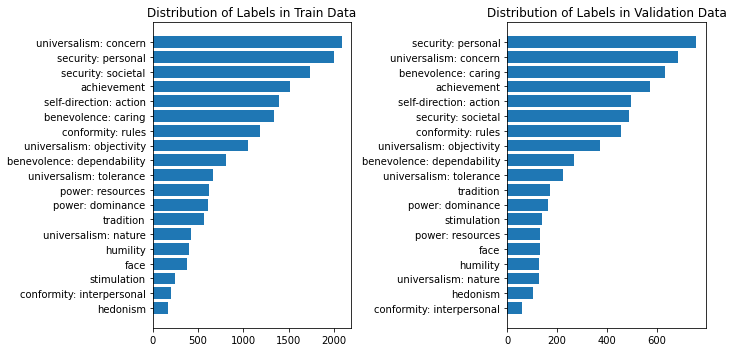

In [ ]:
LABEL_COLUMNS = y_train.columns.tolist()[1:]
print(len(LABEL_COLUMNS))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Distribution of labels in train data
ax[0].barh(y_train[LABEL_COLUMNS].sum().sort_values().index, y_train[LABEL_COLUMNS].sum().sort_values().values)
ax[0].set_title("Distribution of Labels in Train Data")

# Distribution of labels in validation data
ax[1].barh(y_val[LABEL_COLUMNS].sum().sort_values().index, y_val[LABEL_COLUMNS].sum().sort_values().values)
ax[1].set_title("Distribution of Labels in Validation Data")

plt.tight_layout()
plt.show()

## Tokenize and encode input 

In [ ]:
pip install transformers

In [ ]:
from transformers import BertTokenizer
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [ ]:
batch_size = 64

# Create the tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
def tokenize_and_encode(df):
    max_length = 256
    
    encoding = tokenizer.batch_encode_plus(df["text"], max_length=max_length, padding=True, truncation=True)
    
    input_ids = torch.tensor(encoding['input_ids'])
    attention_mask = torch.tensor(encoding['attention_mask'])

    return input_ids, attention_mask

In [ ]:
# Tokenize and encode
# train
input_ids, attention_mask = tokenize_and_encode(X_train)
train_inputs = torch.tensor(input_ids)
train_labels = torch.tensor(list(X_train["labels"].values))
train_mask = torch.tensor(attention_mask)

# val
input_ids_val, attention_mask_val = tokenize_and_encode(X_val)
val_inputs = torch.tensor(input_ids_val)
val_labels = torch.tensor(list(X_val["labels"].values))
val_mask = torch.tensor(attention_mask_val)

<ipython-input-41-f81cf6d13e16>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_inputs = torch.tensor(input_ids)
<ipython-input-41-f81cf6d13e16>:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  train_labels = torch.tensor(list(X_train["labels"].values))
<ipython-input-41-f81cf6d13e16>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_mask = torch.tensor(attention_mask)
<ipython-input-41-f81cf6d13e16>:10: UserWarning: To copy construct from a tensor, it is recommende

In [ ]:
train_data = TensorDataset(train_inputs, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_mask, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

## BERT model




In [ ]:
from torch import nn
from tqdm import tqdm, trange
from torch.optim import AdamW
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertForSequenceClassification, BertTokenizer
from sklearn.metrics import f1_score

##[1] Training

###[1] opt learning rate 6e-6

In [ ]:
# load the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', problem_type="multi_label_classification", num_labels=20)
model.to('cuda:0')

# config
model.config.eos_token_id = tokenizer.sep_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.max_length = 516
model.config.min_length = 20
model.config.no_repeat_ngram_size = 3
model.config.early_stopping = True
model.config.num_beams = 4

# define the loss function and optimizer
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = AdamW(model.parameters(), lr=6e-6)

In [ ]:
# Number of training epochs
epochs = 50

In [ ]:
# For Storing our loss and accuracy for plotting
val_f1_score_history, training_loss_history = [],[]

for _ in trange(epochs, desc="Training"):
  # training
  model.train()
  tot_loss = 0
  # Tracking variables
  tr_loss = 0 #running loss
  nb_tr_steps = 0

  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    model.to("cuda:0")
    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    # Perform a forward pass on the GPU
    outputs = model(ids, attention_mask=mask)

    logits = outputs[0]
    
    #convert labels to float for calculation
    loss = criterion(logits,labels.type_as(logits)) 
    
    
    # Perform backpropagation and optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_steps += 1

  training_loss_history.append(tr_loss/nb_tr_steps)

  ###############################################################################

  # Validation
  model.eval()
  val_f1_score = 0

  # Predict
  for i, batch in enumerate(val_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    with torch.no_grad():
      # Forward pass
      outputs = model(ids, attention_mask=mask)
      pred_logits = outputs[0]
      pred_labels = torch.sigmoid(pred_logits)
      pred_logits = pred_logits.cpu().numpy()
      pred_labels = pred_labels.cpu().numpy()
      labels = labels.cpu().numpy()

    # Calculate F1 score and Accuracy
    threshold = 0.2
    pred_bools = [pl > threshold for pl in pred_labels]
    true_bools = [tl == 1 for tl in labels]
    val_f1_score += f1_score(true_bools,pred_bools,average='micro')
  
  val_f1_score_history.append( val_f1_score/len(val_dataloader) )

Training: 100%|██████████| 50/50 [2:15:30<00:00, 162.60s/it]


Text(0.5, 1.0, 'Training Loss and F1 score over Epochs')

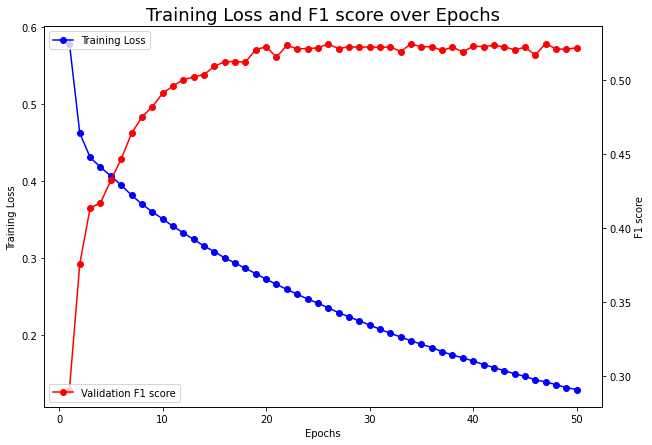

In [ ]:
num_epochs = np.arange(1, epochs+1)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(num_epochs, np.array(training_loss_history), 'bo-', label="Training Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Training Loss")
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(num_epochs, np.array(val_f1_score_history), 'ro-', label="Validation F1 score")
ax2.set_ylabel("F1 score")
ax2.legend(loc='lower left')

ax.set_title("Training Loss and F1 score over Epochs",fontsize=18)

Around epoch 15, the f1_score is greater than 0.50 and lower than 0.55

In [ ]:
print("Lower Training Loss value is {} ".format(np.amin(np.array(training_loss_history))))
print("Higher F1_score value is {} ".format(np.amax(np.array(val_f1_score_history))))

Lower Training Loss value is 0.12929586522719438 
Higher F1_score value is 0.5257793609679369 


## Analyze the errors

### Classification report

The classification report for validation set

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_bools,pred_bools,target_names=y_train.columns, zero_division=0))

                            precision    recall  f1-score   support

   self-direction: thought       0.60      0.60      0.60         5
    self-direction: action       0.60      0.55      0.57        11
               stimulation       0.00      0.00      0.00         0
                  hedonism       0.00      0.00      0.00         0
               achievement       0.29      0.71      0.42         7
          power: dominance       0.27      0.38      0.32         8
          power: resources       0.25      0.50      0.33         2
                      face       0.00      0.00      0.00         4
        security: personal       0.27      0.40      0.32        10
        security: societal       0.59      0.85      0.69        20
                 tradition       0.00      0.00      0.00         3
         conformity: rules       0.73      0.61      0.67        18
 conformity: interpersonal       0.00      0.00      0.00         0
                  humility       0.00      0.00

In [ ]:
#to access drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the fine-tuned model
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/model_bert")

## Evaluation with sigmoid vs softmax and Analysis of Best threshold

In [ ]:
import torch
import torch.nn as nn
import transformers
from transformers import BertForSequenceClassification

# Load the state dict from the saved file
state_dict = torch.load("/content/drive/MyDrive/Colab Notebooks/model_bert")

# Initialize the model
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', problem_type="multi_label_classification", num_labels=20)
bert_model.to("cuda:0")

# Load the state dict into the model
bert_model.load_state_dict(state_dict)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

<All keys matched successfully>

####[1]Sigmoid


100%|██████████| 18/18 [05:42<00:00, 19.00s/it]


Best validation F1 score:  0.5222810552330469
Best threshold:  0.25


Text(0.5, 1.0, 'F1 score over thresholds')

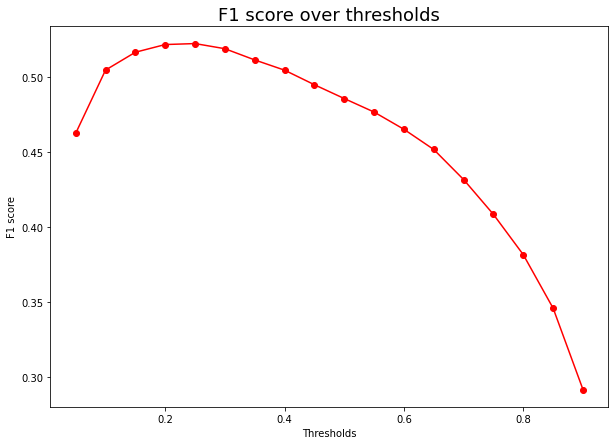

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
# Evaluation
bert_model.eval()

# Initialize the best F1 score and the corresponding threshold
best_f1_score = 0
best_threshold = 0
val_f1_score_history = []

thresholds = np.arange(0.05, 0.95, 0.05)
# Loop over a range of threshold values
for threshold in tqdm(thresholds):
  val_f1_score = 0

  # Predict
  for i, batch in enumerate(val_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    with torch.no_grad():
      # Forward pass
      outputs = bert_model(ids, attention_mask=mask)
      pred_logits = outputs[0]
      pred_labels = torch.sigmoid(pred_logits)
      pred_logits = pred_logits.cpu().numpy()
      pred_labels = pred_labels.cpu().numpy()
      labels = labels.cpu().numpy()

    # Calculate F1 score
    pred_bools = [pl > threshold for pl in pred_labels]
    true_bools = [tl == 1 for tl in labels]
    val_f1_score += f1_score(true_bools,pred_bools,average='micro')
    
  val_f1_score = val_f1_score/len(val_dataloader)
  
  # Update the best F1 score and corresponding threshold if necessary
  if val_f1_score > best_f1_score:
    best_f1_score = val_f1_score
    best_threshold = threshold

  val_f1_score_history.append(val_f1_score)

print('\nBest validation F1 score: ', best_f1_score)   
print('Best threshold: ', best_threshold )

fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(thresholds, np.array(val_f1_score_history),'ro-' ,label="F1 score")
ax.set_xlabel("Thresholds")
ax.set_ylabel("F1 score")
ax.set_title("F1 score over thresholds",fontsize=18)

####[2]Softmax



100%|██████████| 20/20 [06:18<00:00, 18.94s/it]


Best validation F1 score:  0.5130326309661624
Best threshold:  0.01


Text(0.5, 1.0, 'F1 score over thresholds')

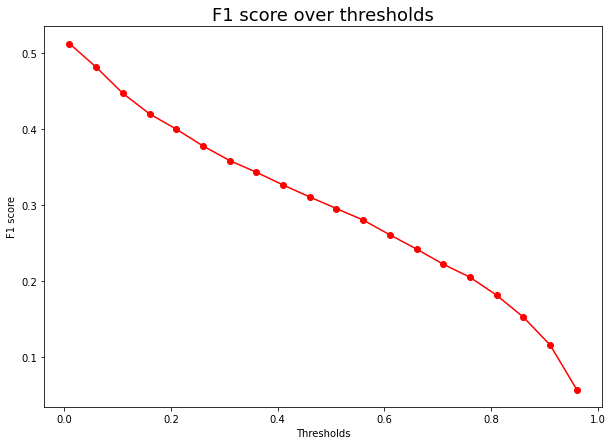

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
# Evaluation
bert_model.eval()

# Initialize the best F1 score and the corresponding threshold
best_f1_score = 0
best_threshold = 0
val_f1_score_history = []

thresholds = np.arange(0.01, 1, 0.05)
# Loop over a range of threshold values
for threshold in tqdm(thresholds):
  val_f1_score = 0

  # Predict
  for i, batch in enumerate(val_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    with torch.no_grad():
      # Forward pass
      outputs = bert_model(ids, attention_mask=mask)
      pred_logits = outputs[0]
      pred_labels = torch.softmax(pred_logits, dim=1)
      pred_logits = pred_logits.cpu().numpy()
      pred_labels = pred_labels.cpu().numpy()
      labels = labels.cpu().numpy()

    # Calculate F1 score
    pred_bools = [pl > threshold for pl in pred_labels]
    true_bools = [tl == 1 for tl in labels]
    val_f1_score += f1_score(true_bools,pred_bools,average='micro')
    
  val_f1_score = val_f1_score/len(val_dataloader)
  
  # Update the best F1 score and corresponding threshold if necessary
  if val_f1_score > best_f1_score:
    best_f1_score = val_f1_score
    best_threshold = threshold

  val_f1_score_history.append(val_f1_score)

print('\nBest validation F1 score: ', best_f1_score)   
print('Best threshold: ', best_threshold )

fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(thresholds, np.array(val_f1_score_history),'ro-' ,label="F1 score")
ax.set_xlabel("Thresholds")
ax.set_ylabel("F1 score")
ax.set_title("F1 score over thresholds",fontsize=18)

##[2] Training

###[2] opt learning rate 2e-5

In [ ]:
# load the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', problem_type="multi_label_classification", num_labels=20)
model.to('cuda:0')

# config
model.config.eos_token_id = tokenizer.sep_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.max_length = 516
model.config.min_length = 20
model.config.no_repeat_ngram_size = 3
model.config.early_stopping = True
model.config.num_beams = 4


# define the loss function and optimizer
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = AdamW(model.parameters(),lr=2e-5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# For Storing our loss and accuracy for plotting
val_f1_score_history_m2, training_loss_history_m2 = [],[]

for _ in trange(epochs, desc="Training"):
  # training
  model.train()
  tot_loss = 0
  # Tracking variables
  tr_loss = 0 #running loss
  nb_tr_steps = 0

  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    model.to("cuda:0")
    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    # Perform a forward pass on the GPU
    outputs = model(ids, attention_mask=mask)

    logits = outputs[0]
    
    #convert labels to float for calculation
    loss = criterion(logits,labels.type_as(logits)) 
    
    
    # Perform backpropagation and optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_steps += 1

  
  #print("Train loss: {}".format(tr_loss/nb_tr_steps))
  training_loss_history_m2.append(tr_loss/nb_tr_steps)

  ###############################################################################


  # Validation
  model.eval()
  val_f1_score = 0

  # Predict
  for i, batch in enumerate(val_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    with torch.no_grad():
      # Forward pass
      outputs = model(ids, attention_mask=mask)
      pred_logits = outputs[0]
      pred_labels = torch.sigmoid(pred_logits)
      pred_logits = pred_logits.cpu().numpy()
      pred_labels = pred_labels.cpu().numpy()
      labels = labels.cpu().numpy()

    # Calculate F1 score and Accuracy
    threshold = 0.2
    pred_bools = [pl > threshold for pl in pred_labels]
    true_bools = [tl == 1 for tl in labels]
    val_f1_score += f1_score(true_bools,pred_bools,average='micro')
  

  #print('Eval- F1 Validation Accuracy: ', val_f1_score)  
  #print('\n')
  val_f1_score_history_m2.append( val_f1_score/len(val_dataloader) )

Training: 100%|██████████| 50/50 [32:39<00:00, 39.19s/it]


Text(0.5, 1.0, 'Training Loss and F1 score over Epochs with lr=2e-5')

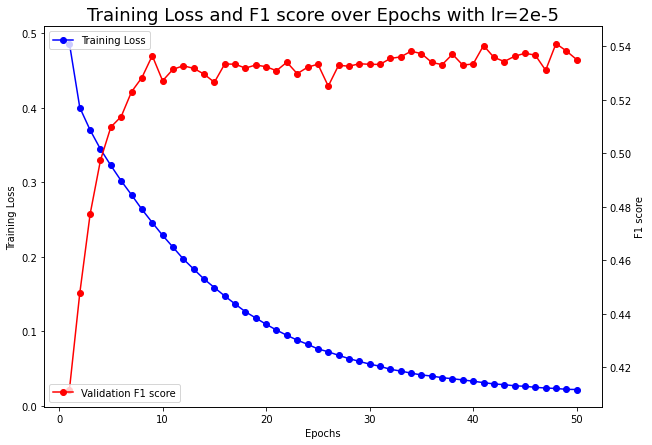

In [ ]:
num_epochs = np.arange(1, epochs+1)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(num_epochs, np.array(training_loss_history_m2), 'bo-', label="Training Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Training Loss")
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(num_epochs, np.array(val_f1_score_history_m2), 'ro-', label="Validation F1 score")
ax2.set_ylabel("F1 score")
ax2.legend(loc='lower left')

ax.set_title("Training Loss and F1 score over Epochs with lr=2e-5",fontsize=18)

Around epoch 10, the f1_score swings between 0.52 and 0.54

In [ ]:
print("Lower Training Loss value is {} ".format(np.amin(np.array(training_loss_history_m2))))
print("Higher F1_score value is {} ".format(np.amax(np.array(val_f1_score_history_m2))))

Lower Training Loss value is 0.021738843247294425 
Higher F1_score value is 0.5410124044238107 


The F1_score with learning rate 2e-5 value is slightly better respect to 0.524 of the learning rate 6e-6.

The min value of Training Loss is lower than with lr=6e-6 (0.129).

In [ ]:
#to access drive
from google.colab import drive
drive.mount('/content/drive')
# Save the fine-tuned model version 2
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/model_bert_m2")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Analyze the errors

### Classification report

In [ ]:
from sklearn.metrics import classification_report

#on validation set model 2
print(classification_report(true_bools,pred_bools,target_names=y_train.columns, zero_division=0))

                            precision    recall  f1-score   support

   self-direction: thought       0.50      0.20      0.29         5
    self-direction: action       0.67      0.36      0.47        11
               stimulation       0.00      0.00      0.00         0
                  hedonism       0.00      0.00      0.00         0
               achievement       0.45      0.71      0.56         7
          power: dominance       0.67      0.50      0.57         8
          power: resources       0.20      0.50      0.29         2
                      face       0.50      0.25      0.33         4
        security: personal       0.23      0.30      0.26        10
        security: societal       0.57      0.85      0.68        20
                 tradition       0.67      0.67      0.67         3
         conformity: rules       0.67      0.56      0.61        18
 conformity: interpersonal       0.00      0.00      0.00         0
                  humility       0.00      0.00

## Evaluation with sigmoid vs softmax and Analysis of Best threshold

In [ ]:
import torch
import torch.nn as nn
import transformers
from transformers import BertForSequenceClassification

# Load the state dict from the saved file
state_dict = torch.load("/content/drive/MyDrive/Colab Notebooks/model_bert_m2")

# Initialize the model
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', problem_type="multi_label_classification", num_labels=20)
bert_model.to("cuda:0")

# Load the state dict into the model
bert_model.load_state_dict(state_dict)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

<All keys matched successfully>

####[1]Sigmoid

100%|██████████| 18/18 [01:09<00:00,  3.84s/it]


Best validation F1 score:  0.5359521759698495
Best threshold:  0.1


Text(0.5, 1.0, 'F1 score over thresholds')

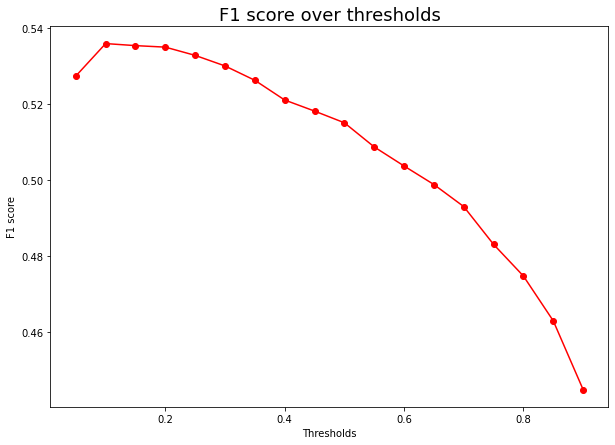

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
# Evaluation
bert_model.eval()

# Initialize the best F1 score and the corresponding threshold
best_f1_score = 0
best_threshold = 0
val_f1_score_history = []

thresholds = np.arange(0.05, 0.95, 0.05)
# Loop over a range of threshold values
for threshold in tqdm(thresholds):
  val_f1_score = 0

  # Predict
  for i, batch in enumerate(val_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    with torch.no_grad():
      # Forward pass
      outputs = bert_model(ids, attention_mask=mask)
      pred_logits = outputs[0]
      pred_labels = torch.sigmoid(pred_logits)
      pred_logits = pred_logits.cpu().numpy()
      pred_labels = pred_labels.cpu().numpy()
      labels = labels.cpu().numpy()

    # Calculate F1 score
    pred_bools = [pl > threshold for pl in pred_labels]
    true_bools = [tl == 1 for tl in labels]
    val_f1_score += f1_score(true_bools,pred_bools,average='micro')
    
  val_f1_score = val_f1_score/len(val_dataloader)
  
  # Update the best F1 score and corresponding threshold if necessary
  if val_f1_score > best_f1_score:
    best_f1_score = val_f1_score
    best_threshold = threshold

  val_f1_score_history.append(val_f1_score)

print('\nBest validation F1 score: ', best_f1_score)   
print('Best threshold: ', best_threshold )

fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(thresholds, np.array(val_f1_score_history),'ro-' ,label="F1 score")
ax.set_xlabel("Thresholds")
ax.set_ylabel("F1 score")
ax.set_title("F1 score over thresholds",fontsize=18)

####[2]Softmax

100%|██████████| 20/20 [01:16<00:00,  3.84s/it]


Best validation F1 score:  0.4936223910792482
Best threshold:  0.01


Text(0.5, 1.0, 'F1 score over thresholds')

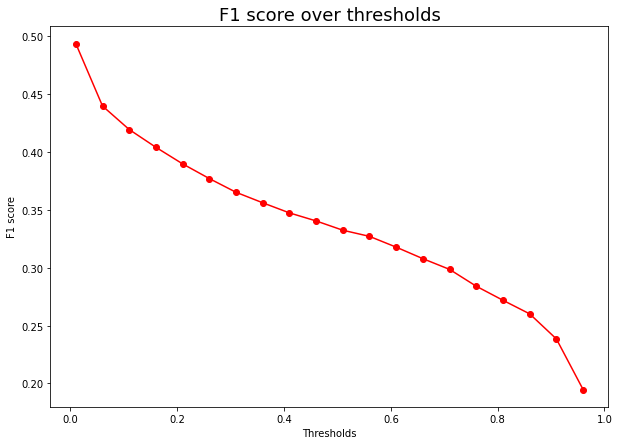

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
# Evaluation
bert_model.eval()

# Initialize the best F1 score and the corresponding threshold
best_f1_score = 0
best_threshold = 0
val_f1_score_history = []

thresholds = np.arange(0.01, 1, 0.05)
# Loop over a range of threshold values
for threshold in tqdm(thresholds):
  val_f1_score = 0

  # Predict
  for i, batch in enumerate(val_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    with torch.no_grad():
      # Forward pass
      outputs = bert_model(ids, attention_mask=mask)
      pred_logits = outputs[0]
      pred_labels = torch.softmax(pred_logits, dim=1)
      pred_logits = pred_logits.cpu().numpy()
      pred_labels = pred_labels.cpu().numpy()
      labels = labels.cpu().numpy()

    # Calculate F1 score
    pred_bools = [pl > threshold for pl in pred_labels]
    true_bools = [tl == 1 for tl in labels]
    val_f1_score += f1_score(true_bools,pred_bools,average='micro')
    
  val_f1_score = val_f1_score/len(val_dataloader)
  
  # Update the best F1 score and corresponding threshold if necessary
  if val_f1_score > best_f1_score:
    best_f1_score = val_f1_score
    best_threshold = threshold

  val_f1_score_history.append(val_f1_score)

print('\nBest validation F1 score: ', best_f1_score)   
print('Best threshold: ', best_threshold )

fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(thresholds, np.array(val_f1_score_history),'ro-' ,label="F1 score")
ax.set_xlabel("Thresholds")
ax.set_ylabel("F1 score")
ax.set_title("F1 score over thresholds",fontsize=18)

#Alternative solutions





## Pre-processing

In [ ]:
import re
from functools import reduce
import nltk
from nltk.corpus import stopwords
from typing import List, Callable
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# define lemmatizer, good symbols and stopwords
stemmer = WordNetLemmatizer()

GOOD_SYMBOLS_RE = re.compile('[^0-9a-z]')
try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def filter_out_uncommon_symbols(text: str) -> str:
    """
    Removes any special character that is not in the good symbols list (check regular expression)
    """
    return GOOD_SYMBOLS_RE.sub(' ', text)

def remove_stopwords(text: str) -> str:
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])

def strip_text(text: str) -> str:
    """
    Removes any left or right spacing (including carriage return) from text.
    """
    return text.strip()

def lemmatiz(text: str) -> str:
    
    return ' '.join([stemmer.lemmatize(x) for x in text.split()])

In [ ]:
PREPROCESSING_PIPELINE = [
                          filter_out_uncommon_symbols,
                          remove_stopwords,
                          strip_text,
                          lemmatiz
                          ]

def text_prepare(text: str,
                 filter_methods: List[Callable[[str], str]] = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

In [ ]:
# take the original df
x1 = X_train.copy()
x2 = X_val.copy()
x3 = X_test.copy()

In [ ]:
# apply preprocessing

x1.premise = x1.premise.apply(lambda txt: text_prepare(txt))
x2.premise = x2.premise.apply(lambda txt: text_prepare(txt))
x3.premise = x3.premise.apply(lambda txt: text_prepare(txt))

x1.conclusion = x1.conclusion.apply(lambda txt: text_prepare(txt))
x2.conclusion = x2.conclusion.apply(lambda txt: text_prepare(txt))
x3.conclusion = x3.conclusion.apply(lambda txt: text_prepare(txt))

In [ ]:
# create new dataframe with the text preprocessed

x1['text'] = x1.premise + ' ' + x1.stance + ' ' + x1.conclusion
x2['text'] = x2.premise + ' ' + x2.stance + ' ' + x2.conclusion
x3['text'] = x3.premise + ' ' + x3.stance + ' ' + x3.conclusion

x1["labels"] = [y_train.iloc[n].values for n in range(len(y_train))]
x2["labels"] = [y_val.iloc[n].values for n in range(len(y_val))]

x1[['text', 'labels']].head()



,text,labels
0,ban human cloning cause huge issue bunch human...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,fast food banned really bad health costly in f...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,sometimes economic sanction thing get corrupt ...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,capital punishment sometimes option keep crimi...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
4,factory farming allows production cheap food n...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ..."


Y_train = y_train.set_index('Argument ID')
Y_val = y_val.set_index('Argument ID')

## LSTM

###Tokenizer

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import gensim
import gensim.downloader as gloader

In [ ]:
# initialize tokenizer and feed with train set

tok = Tokenizer(num_words=5000)
tok.fit_on_texts(x1.text)

X1 = tok.texts_to_sequences(x1.text)
X2 = tok.texts_to_sequences(x2.text)

vocab_size = len(tok.word_index) + 1

maxlen = 200

X1 = pad_sequences(X1, padding='post', maxlen=maxlen)
X2 = pad_sequences(X2, padding='post', maxlen=maxlen)

In [ ]:
# initialize GloVe word embeddings

embedding_dimension = 100 
# download and load the vocabulary glove
download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
embedding_model = gloader.load(download_path)

# assign word vectors from glove model

vocab_size = len(tok.word_index) + 1

# create an empty embedding matix
embedding_vector = np.zeros((vocab_size, embedding_dimension))

# create a word to index dictionary mapping
word2id = tok.word_index

# copy vectors from glove model to the words present in corpus, OOV words set to 0
for word, index in word2id.items():
    try:
        embedding_vector[index] = embedding_model[word]
    except KeyError:
        embedding_vector [index] = np.zeros(embedding_dimension) 

[==================================================] 100.0% 128.1/128.1MB downloaded


### Model

In [ ]:
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM,Embedding, Input
from keras.models import Model
from keras.utils import plot_model

In [ ]:
# define model

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vector], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(20, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 100)          678200    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 20)                2580      
                                                                 
Total params: 798,028
Trainable params: 119,828
Non-trainable params: 678,200
_________________________________________________________________
None


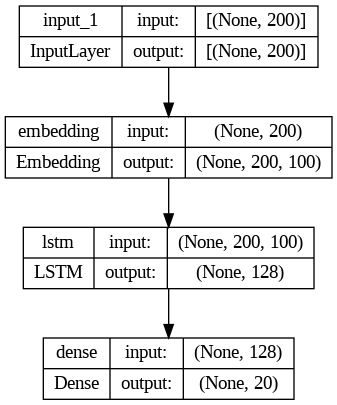

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
y1 = y_train.values
y2 = y_val.values

In [ ]:
# fit the model

history = model.fit(X1, y1, batch_size=64, epochs=20, verbose='auto', validation_data=(X2,y2))

Epoch 1/20
85/85 [==============================] - 50s 25ms/step - loss: 0.4496 - acc: 0.0545 - val_loss: 0.4116 - val_acc: 0.1524
Epoch 2/20
85/85 [==============================] - 1s 17ms/step - loss: 0.4165 - acc: 0.0775 - val_loss: 0.4100 - val_acc: 0.1524
Epoch 3/20
85/85 [==============================] - 1s 13ms/step - loss: 0.4162 - acc: 0.0579 - val_loss: 0.4126 - val_acc: 0.1524
Epoch 4/20
85/85 [==============================] - 1s 13ms/step - loss: 0.4158 - acc: 0.0736 - val_loss: 0.4116 - val_acc: 0.0153
Epoch 5/20
85/85 [==============================] - 1s 14ms/step - loss: 0.4160 - acc: 0.0534 - val_loss: 0.4098 - val_acc: 0.0153
Epoch 6/20
85/85 [==============================] - 1s 14ms/step - loss: 0.4159 - acc: 0.0579 - val_loss: 0.4111 - val_acc: 0.0153
Epoch 7/20
85/85 [==============================] - 2s 19ms/step - loss: 0.4159 - acc: 0.0473 - val_loss: 0.4103 - val_acc: 0.0153
Epoch 8/20
85/85 [==============================] - 2s 18ms/step - loss: 0.4160 - 

### Plot

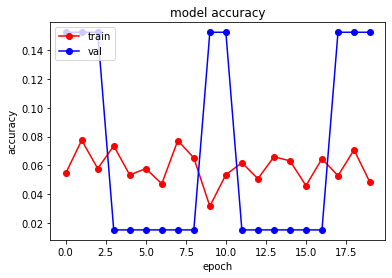

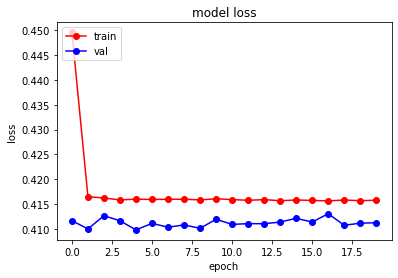

In [ ]:
import matplotlib.pyplot as plt

# plot accuracy and loss

plt.plot(history.history['acc'], '-ro')
plt.plot(history.history['val_acc'], '-bo')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], '-ro')
plt.plot(history.history['val_loss'], '-bo')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

we can see that the accuracy, in particular for the validation set, it's not linear. It is always around 2 value and fluctuates between this two, btw the max accuracy is around 15%

The loss value is always around the same value, no big change

## Scikit-multilearn

###Vectorizer

In [ ]:
pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 5.5 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
xfeatures_train = tfidf.fit_transform(x1.text).toarray()
xfeatures_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
xfeatures_val = tfidf.transform(x2.text)
xfeatures_test = tfidf.transform(x3.text)

###Model

In [ ]:
from sklearn.metrics import accuracy_score, hamming_loss
from skmultilearn.problem_transform import LabelPowerset, BinaryRelevance, ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

In [ ]:
# function to build differe model

def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    clf = mlb_estimator(model)
    print(clf)
    clf.fit(xtrain,ytrain)
    clf_predictions = clf.predict(xtest)
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy":acc,"hamming_score":ham}
    return result

In [ ]:
alpha = [1, 0.5, 1.0e-10]
classifier = [BinaryRelevance, ClassifierChain, LabelPowerset]

BinaryRelevance(classifier=MultinomialNB(alpha=1), require_dense=[True, True])
BinaryRelevance(classifier=MultinomialNB(alpha=0.5), require_dense=[True, True])
BinaryRelevance(classifier=MultinomialNB(alpha=1e-10),
                require_dense=[True, True])
ClassifierChain(classifier=MultinomialNB(alpha=1), require_dense=[True, True])
ClassifierChain(classifier=MultinomialNB(alpha=0.5), require_dense=[True, True])
ClassifierChain(classifier=MultinomialNB(alpha=1e-10),
                require_dense=[True, True])
LabelPowerset(classifier=MultinomialNB(alpha=1), require_dense=[True, True])
LabelPowerset(classifier=MultinomialNB(alpha=0.5), require_dense=[True, True])
LabelPowerset(classifier=MultinomialNB(alpha=1e-10), require_dense=[True, True])


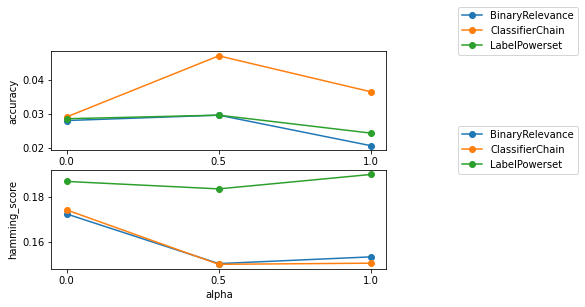

In [ ]:
fig, ax = plt.subplots(2)

for j in classifier:
  acc = []
  hs = []
  for a in alpha:
    clf_model = build_model(MultinomialNB(alpha=a), j, xfeatures_train,y_train,xfeatures_val,y_val)
    acc.append(clf_model["accuracy"])
    hs.append(clf_model["hamming_score"])

  ax[0].plot(alpha, acc, 'o-', label= str(j).split('.')[-1].split("'")[0])
  ax[1].plot(alpha, hs, 'o-', label= str(j).split('.')[-1].split("'")[0])

ax[0].set(xlabel='alpha', ylabel='accuracy', xticks=alpha)
ax[0].legend(loc='upper left', bbox_to_anchor=(1.2,1.5))

ax[1].set(xlabel='alpha', ylabel='hamming_score', xticks=alpha)
ax[1].legend(loc='upper left', bbox_to_anchor=(1.2,1.5))

plt.show()

We can see that the value for the 3 classifier with different alpha are almost the same. For the accuracy the ClassifierChain performs better, while for the hamming_loss the LabelPowerset is slightly worse.

##OneVsRestClassifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

###Model

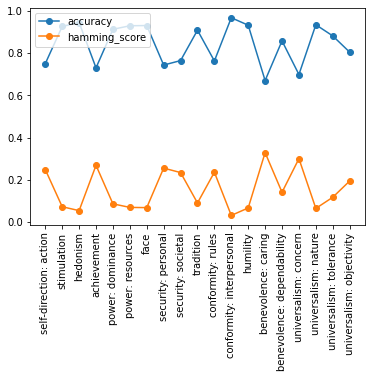

In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

acc = []
hl = []

for category in LABEL_COLUMNS:
    # train the model using X_dtm & y
    NB_pipeline.fit(x1.text, y_train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(x2.text)
    acc.append(accuracy_score(y_val[category], prediction))
    hl.append(hamming_loss(y_val[category], prediction))


plt.plot(LABEL_COLUMNS, acc, 'o-', label = 'accuracy')
plt.plot(LABEL_COLUMNS, hl, 'o-', label= 'hamming_score')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

We can see that this type of training has a very high accuracy, almost 0.9 for every label, and an hamming loss around 0.2